# Working with Hierachies in Atoti

In this notebook, we'll show you what you need to know to start working with hierarchies when using the Atoti Python API.

Before we begin, let's start off with a refresher from our Atoti Python API [Tutorial](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Multidimensional-concepts):

> A **cube** is a multidimensional view of some data, making it easy to explore, aggregate, filter and compare. It’s called a cube because each attribute of the data can be represented as a dimension of the cube. The axes of the cube are called **hierarchies**. The purpose of multidimensional analysis is to visualize some numeric indicators at specific coordinates of the cube. These indicators are called **measures**.

In other words, the purpose of an OLAP cube is to provide multidimensional analysis capabilities, which gives us the flexibility to slice-and-dice our data however we see fit. With this being said, let's talk about hierarchies!

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=hierarchies" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try Atoti"></a></div>

## Import Libraries

First things first, let's import our libraries.

In [1]:
import atoti as tt
import pandas

## Instantiate Atoti Server and Link UI

Next, we'll spin up the Atoti server and link the session to our web-based Atoti UI.

💡 **Note**: https://docs.atoti.io/latest/api/atoti.Session.html#atoti.Session

In [2]:
session = tt.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Load CSVs from S3 Into Atoti Tables

From here on, we'll load the following CSVs from S3 into Atoti Tables.

* [Orders](#Orders)
* [Products](#Products)
* [Shippers](#Shippers)
* [Customers](#Customers)
* [Employees](#Employees)

💡 **Note**: Sometimes we want inherently numerical columns to be used as hierarchies instead of measures (e.g. an Order ID should be used as a hierarchy rather than a measure, and does not need to be aggregated). For this reason, we can explicitly set specific Atoti Table columns as desired data types (in this case strings) when loading data into Atoti Tables.

See https://docs.atoti.io/latest/api/atoti.Session.read_csv.html#atoti.Session.read_csv for more info.

### Orders

In [3]:
orders = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Orders.csv",
    types={
        "OrderId": tt.STRING,
        "OrderDate": tt.LOCAL_DATE,
        "ProductId": tt.STRING,
        "EmployeeId": tt.STRING,
        "CustomerId": tt.STRING,
    },
    date_patterns={"OrderDate": "dd/M/yyyy"},
    keys=["OrderId"],
)
orders.head()

,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
OrderId,,,,,,,
13,2024-02-18,233,32.01,Federal Shipping,1358,18551,c4859
27,2024-02-18,749,21.96,Rapid Post,1514,26584,c4747
41,2024-02-18,454,11.73,Freight United,773,98635,c2675
55,2024-02-18,2,32.18,Speedy Express,1137,18336,c1275
69,2024-02-18,672,56.04,Speedy Express,591,26584,c3067


### Products

In [4]:
products = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Products.csv",
    types={
        "ProductId": tt.STRING,
        "ProductName": tt.STRING,
        "ProductCategory": tt.STRING,
        "Supplier": tt.STRING,
        "PurchasingPricePerUnit": tt.DOUBLE,
    },
    keys=["ProductId"],
)
products.head()

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,
695,Gorgonzola Telino,Dairy Products,Formaggi Fortini s.r.l.,7.2
877,Mascarpone Fabioli,Dairy Products,Formaggi Fortini s.r.l.,18.43
1059,Ipoh Coffee,Beverages,Leka Trading,31.05
1241,Spegesild,Seafood,Lyngbysild,6.48
1423,Gumbär Gummibärchen,Confections,Heli Süßwaren GmbH & Co. KG,16.81


### Shippers

In [5]:
shippers = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Shippers.csv",
    types={
        "ShipperName": tt.STRING,
        "Contact": tt.STRING,
    },
)
shippers.head()

,ShipperName,Contact
0,Freight United,Geoff Matthews
1,Federal Shipping,Liz Welds
2,Rapid Post,Payal Shah
3,The Transporter,Funmi Odunga
4,United Package,Junqi Huang


### Customers

In [6]:
customers = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Customers.csv",
    types={
        "CustomerId": tt.STRING,
        "CompanyName": tt.STRING,
        "Region": tt.STRING,
        "Country": tt.STRING,
        "Address": tt.STRING,
        "City": tt.STRING,
        "PostCode": tt.STRING,
        "Phone": tt.STRING,
    },
    keys=["CustomerId"],
)
customers.head()

,CompanyName,Address,City,PostalCode,Region,Country,Subregion,Phone,PostCode
CustomerId,,,,,,,,,
c3571,Bon app',"12, rue des Bouchers",Marseille,13008,Europe,France,Western Europe,91.24.45.40,N/A
c4075,Drachenblut Delikatessen,Walserweg 21,Aachen,52066,Europe,Germany,Western Europe,0241-039123,N/A
c4243,Galería del gastrónomo,"Rambla de Cataluña, 23",Barcelona,8022,Europe,Spain,Southern Europe,(93) 203 4560,N/A
c5083,Laughing Bacchus Wine Cellars,1900 Oak St.,Vancouver,V3F 2K1,Northern America,Canada,North America,(604) 555-3392,N/A
c5027,Lazy K Kountry Store,12 Orchestra Terrace,Walla Walla,99362,Northern America,United States,North America,(509) 555-7969,N/A


### Employees

In [7]:
employees = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Employees.csv",
    types={
        "EmployeeId": tt.STRING,
        "EmployeeName": tt.STRING,
        "EmployeeCountry": tt.STRING,
        "EmployeeCity": tt.STRING,
    },
    keys=["EmployeeId"],
)
employees.head()

,EmployeeName,EmployeeZone,EmployeeCountry,EmployeeCity
EmployeeId,,,,
63528,Sean Tan,ASIA,SG,Singapore
98635,Shannon Lim,ASIA,SG,Singapore
12344,Paul Henry,EMEA,FR,Paris
12695,Louis Philippe,EMEA,FR,Lyon
18336,Steven Buchanan,EMEA,UK,London


## Join Tables and Create Cube

Now that our data is loaded into Atoti Tables and in the format that we want, we can join our tables together on their common keys and create our Atoti cube.

In [8]:
# Join tables
orders.join(products, orders["ProductId"] == products["ProductId"])
orders.join(employees, orders["EmployeeId"] == employees["EmployeeId"])
orders.join(customers, orders["CustomerId"] == customers["CustomerId"])
orders.join(shippers, orders["ShipperName"] == shippers["ShipperName"])

In [9]:
# Create Cube from Atoti Table object
cube = session.create_cube(orders)

## Analyze the Atoti Cube

Now that the data has been loaded into the cube, we'll want to examine the data model of the cube to confirm that the columns and data types match up to what we expect. In addition, we can view the hierarchies, levels, and measures for our cube by assigning them to variables.

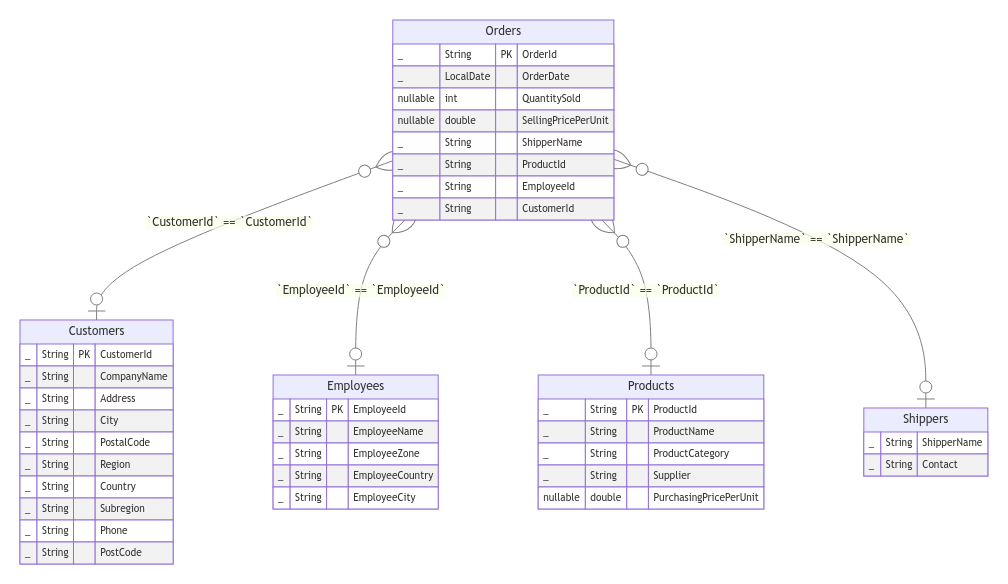

In [10]:
# View the schema of the data model
session.tables.schema

In [11]:
# Set variables for hierarchies, levels, and measures
h, l, m = cube.hierarchies, cube.levels, cube.measures

## Viewing Hierarchies

Because this walk through will mainly be focusing on hierarchies, let's view the hierarchies for the data model by printing the list of hierarchies based on the variable that we assigned.

We can see that each hierarchy is categorized under dimensions, which derive from the Atoti tables that we loaded, and each hierarchy has it's own set of levels (starting with a 0-based index).

💡 **Note**: Hierarchies can have [multiple levels](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Multilevel-hierarchies), which we will show [later in this notebook](#Using-Multi-Level-Hierarchies).

In [12]:
h

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x13331ccd0>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x13331c430>, ('Orders', 'ProductId'): <atoti.hierarchy.Hierarchy object at 0x13331c5e0>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x13331ec50>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x13331ee30>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x13331ef20>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x13331f010>, ('Shippers', 'Contact'): <atoti.hierarchy.Hierarchy object at 0x13331f100>, ('Orders', 'EmployeeId'): <atoti.hierarchy.Hierarchy object at 0x13331f1f0>, ('Customers', 'PostCode'): <atoti.hierarchy.Hierarchy object at 0x13331f2e0>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x13331f3d0>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x13331f4c0>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x13331f5b0>, ('Customers', 'Subregion'): <atoti.hierarchy.Hierarchy object at 0x13331f6a0>, ('Orders', 'CustomerId'): <atoti.hierarchy.Hierarchy object at 0x13331f790>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x13331f880>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x13331f970>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x13331fa60>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x13331fb50>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x13331fc40>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x13331fd30>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x13331fe20>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x13331ff10>}

## Hierarchy Basics

Now that we have our cube up and running and have checked the hierarchies present in the cube, let's use `session.widget` to open up an Atoti JupyterLab extension connected to our cube, and investigate the quantity sold per product.

Here we can use the `ProductId` hierarchy and the `QuantitySold.SUM` measure to perform this operation in Atoti.

💡 **Note**: You may also use `session.link` to perform the same investigation within the Atoti UI; however, for the purposes of this walk through, we've elected to use `session.widget` so that we can show our analysis directly within this Jupyter notebook.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
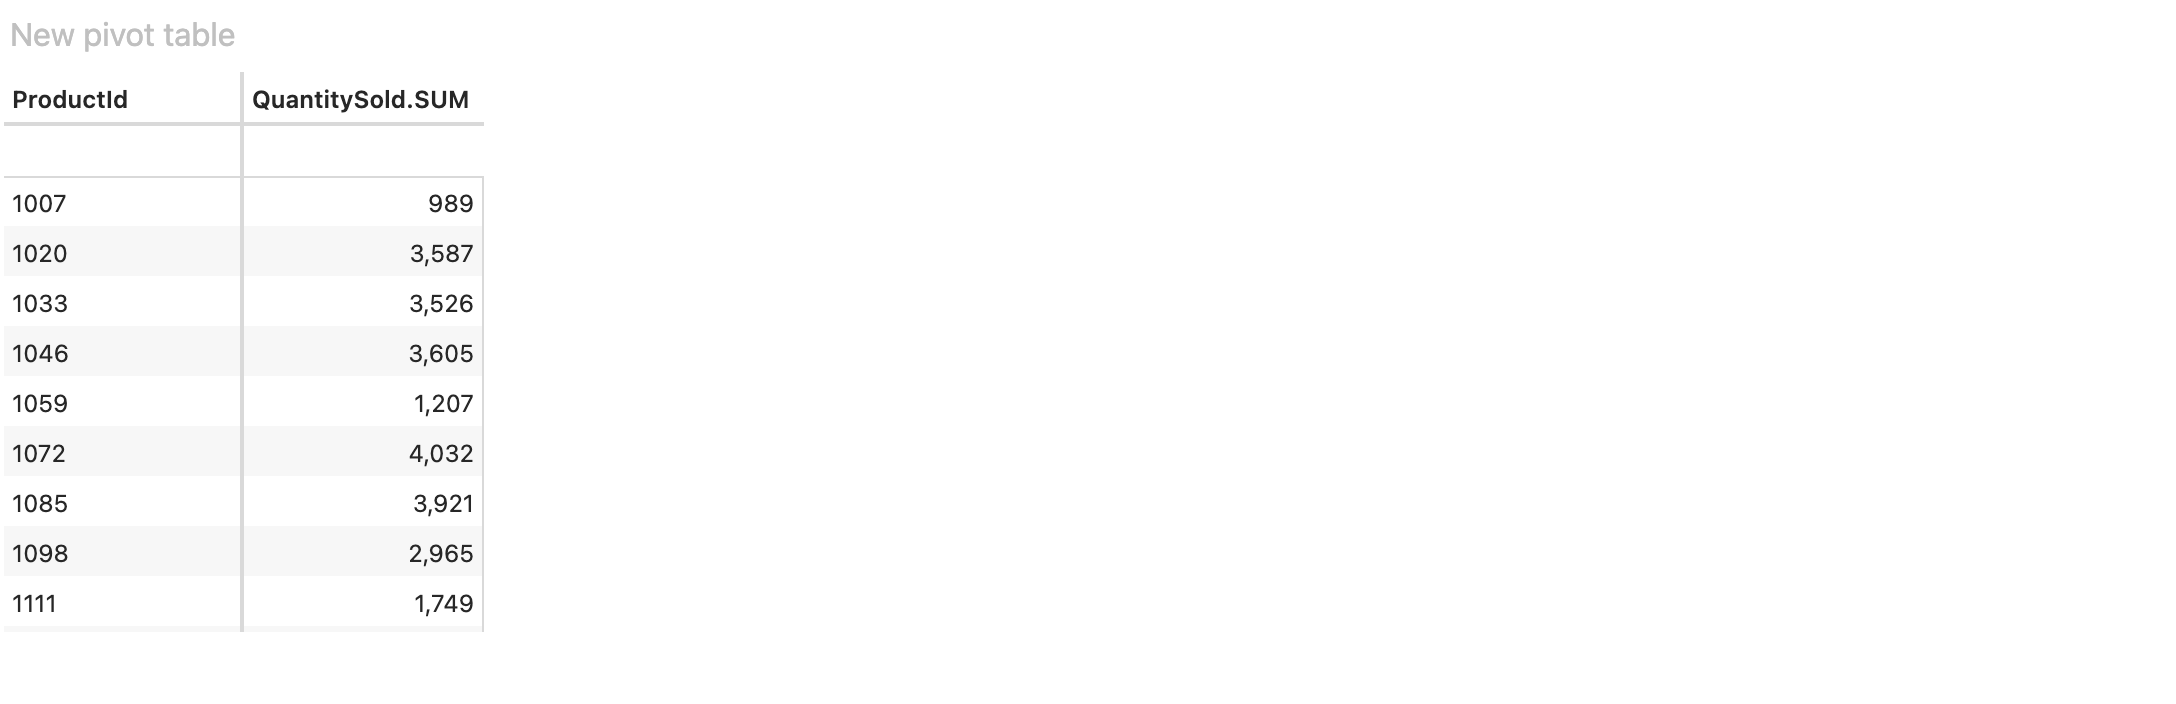

In [34]:
session.widget

But perhaps we also want to know the particular customers that bought each product, along with the quantity sold per product and customer. With Atoti, this is as simple as adding another hierarchy, `CustomerId`, to our analysis to further slice-and-dice our data. As we can see, the total for the `QuantitySold.SUM` measure stays the same at `212,034`, but we can drill down to see a more granular breakdown.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
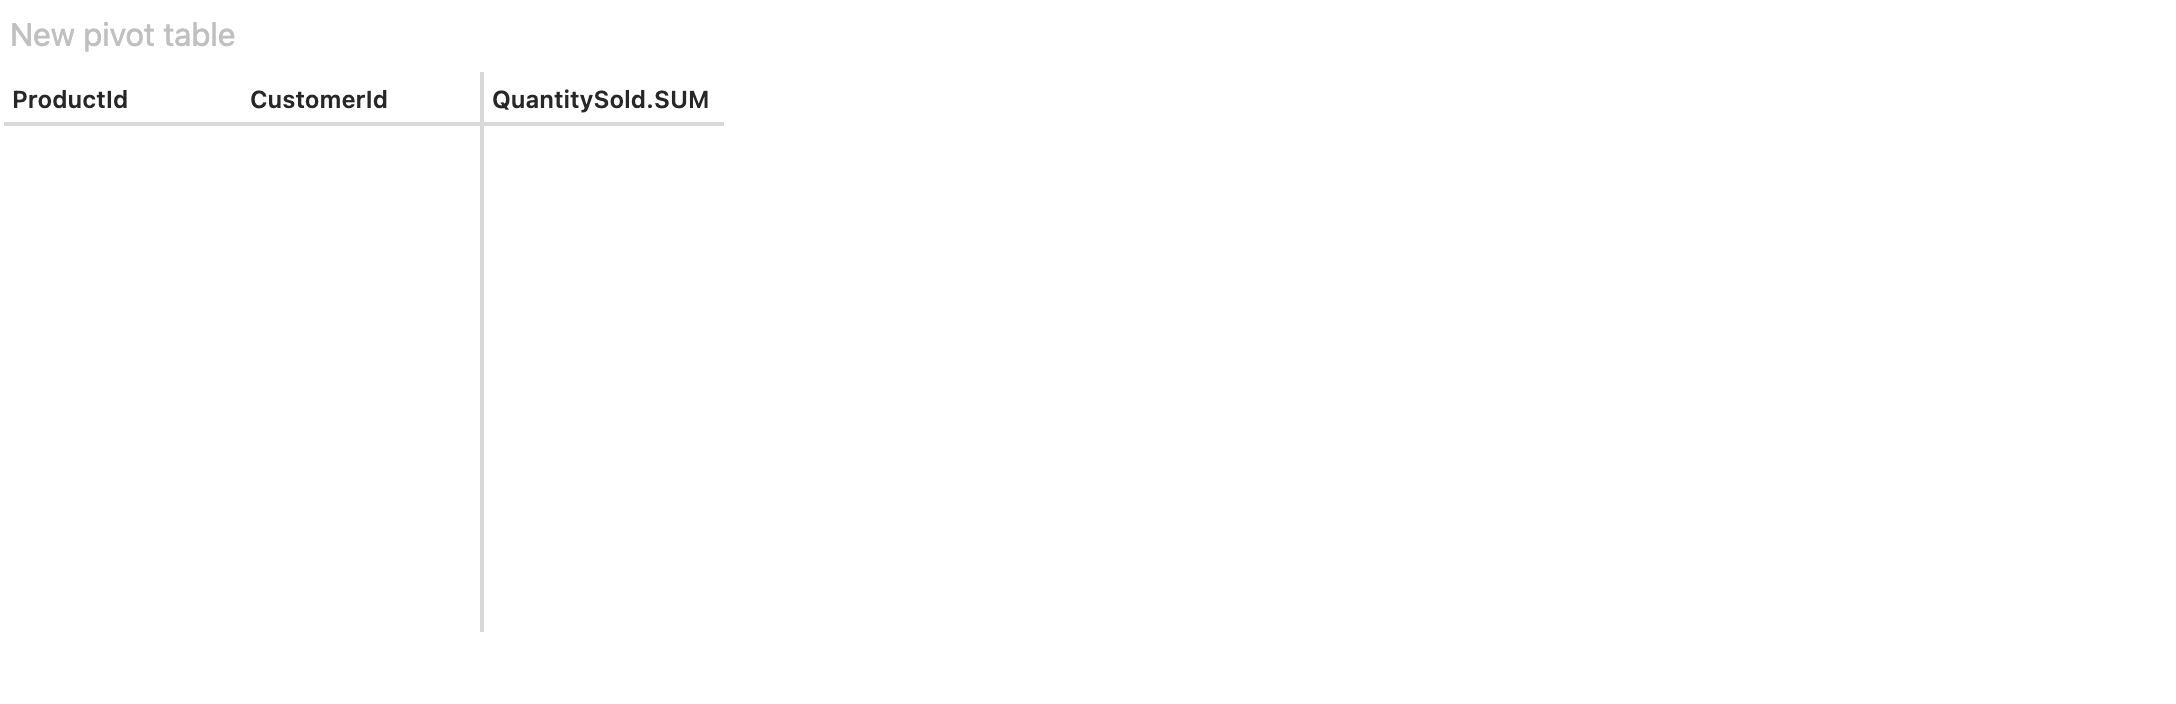

In [14]:
session.widget

## Using Multi-Level Hierarchies

As we mentioned previously, our hierarchies in the cube currently have one level each, but sometimes there are parent-child relationships that we want to logically group together in Atoti to exemplify these relationships. For example, there is a parent-child relationship between our `ProductCategory` (parent) and `ProductId` (child) hierarchies, as each individual product falls within the umbrella of a higher-level product category.

We can create a new `Product` multi-level hierarchy that uses the underlying levels for the `ProductCategory` and `ProductId` hierarchies.

In [15]:
h["Product"] = [l["ProductCategory"], l["ProductId"]]

As a best practice, we should also clean up the associated single-level hierarchies to avoid redundancy.

When we take a look back at our list of hierarchies, either in the Atoti JupyterLab extension or the Atoti UI, we can now see our new multi-level hierarchy `Product` with a drop-down to represent it's underlying (multiple) levels.

![multi-level-hierarchies](images/multi-level-hierarchies.png)


And if we now use the `Product` hierarchy in our analysis, we get a breakdown of our data for `QuantitySold.SUM` by associated product categories and product IDs.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
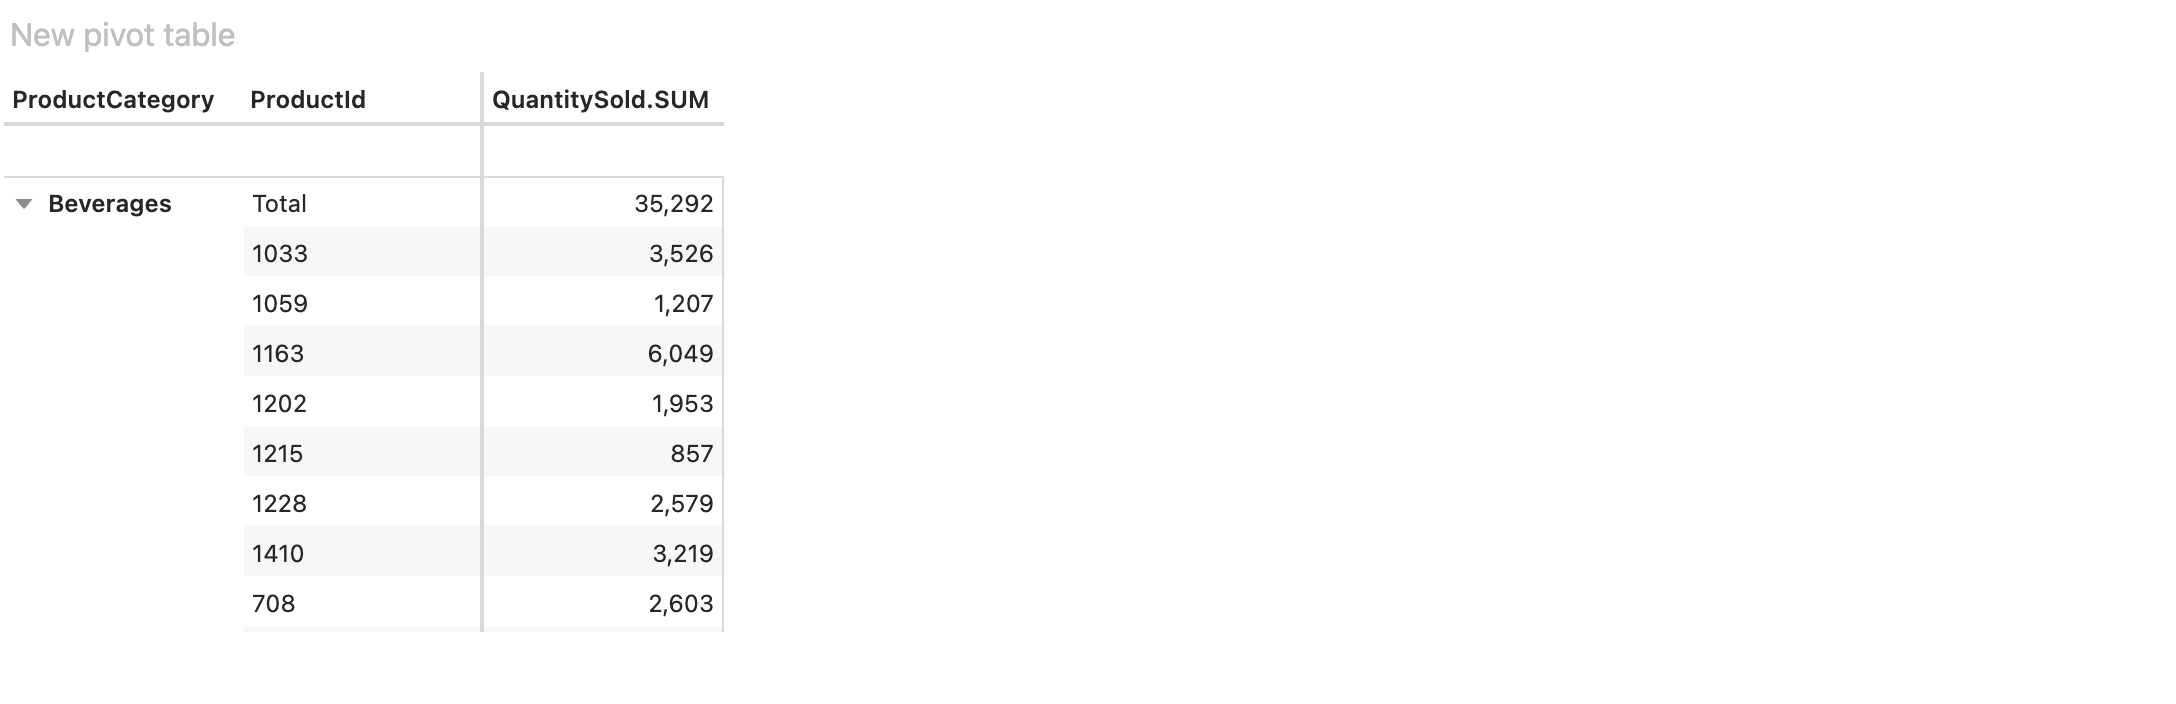

In [16]:
session.widget

## Multi-Level Date Hierarchies

One of the most common use cases for creating multi-level hierarchies is when dealing with dates. For example, perhaps we want to have a multi-level `OrderDate` hierarchy that shows the breakdown for each corresponding year, quarter, month, day, and so on.

As of right now, our single-level `OrderDate` hierarchy can only drill-down to the fully qualified date as shown. 

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
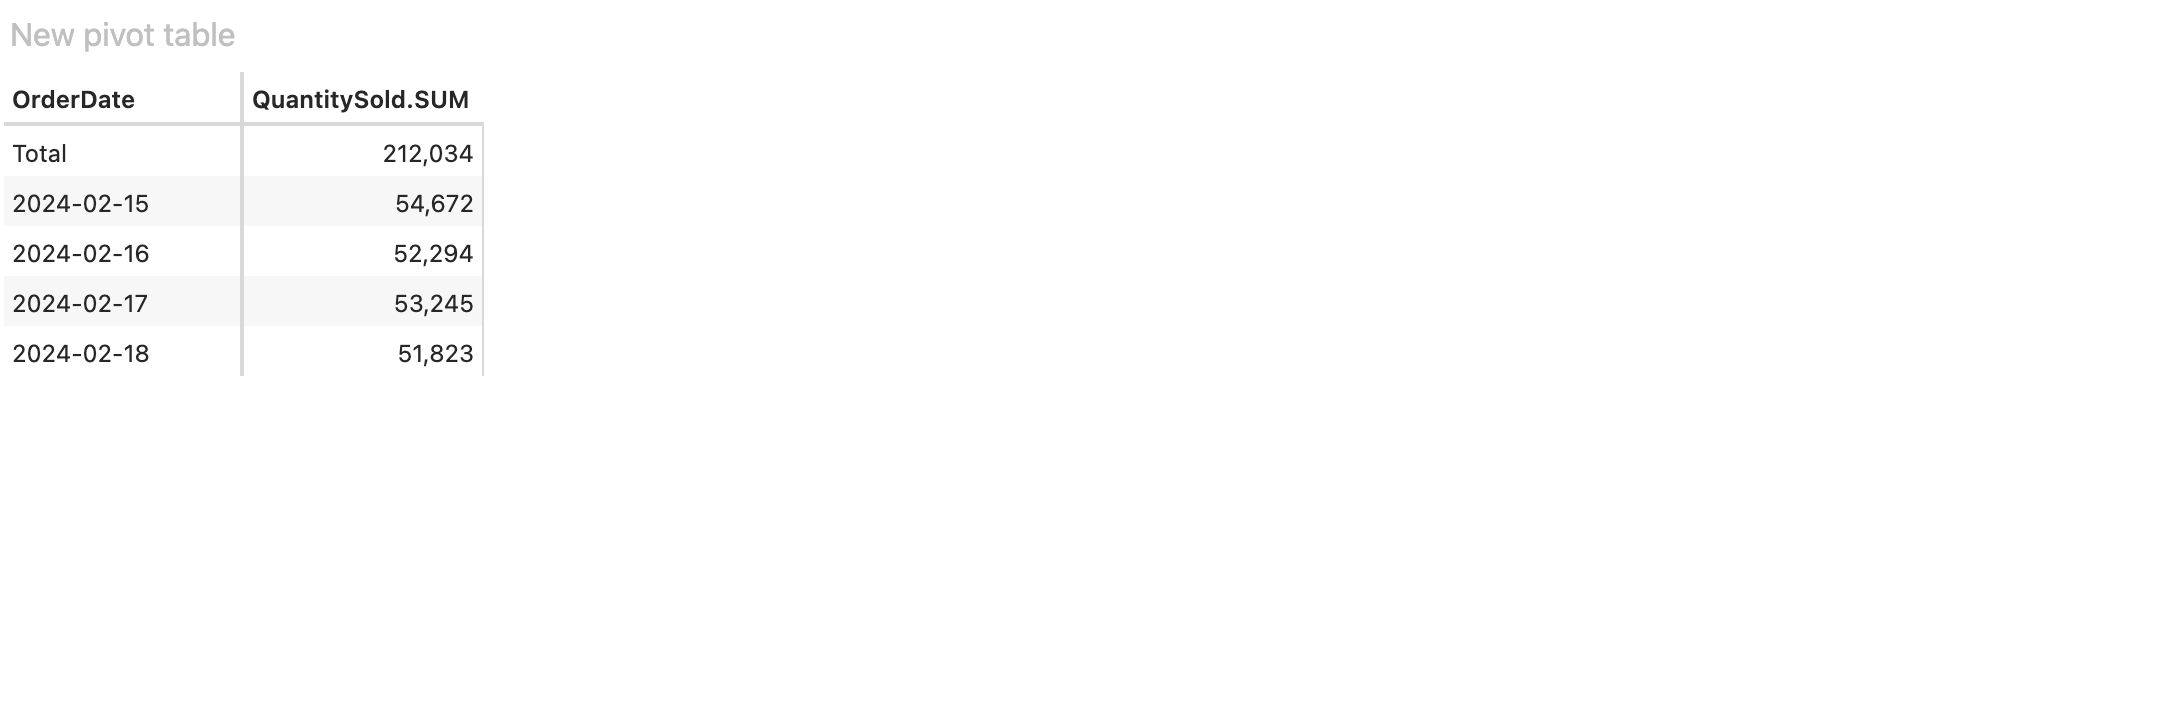

In [17]:
session.widget

But if we create a multi-level `OrderDate` hierarchy, we can then show the breakdown for each corresponding year, quarter, month, and day.

💡 **Note**: https://docs.atoti.io/latest/api/atoti.Cube.create_date_hierarchy.html#atoti.Cube.create_date_hierarchy

In [18]:
# Create a multi-level date hierarchy
cube.create_date_hierarchy(
    "Multi-level Date",
    column=orders["OrderDate"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
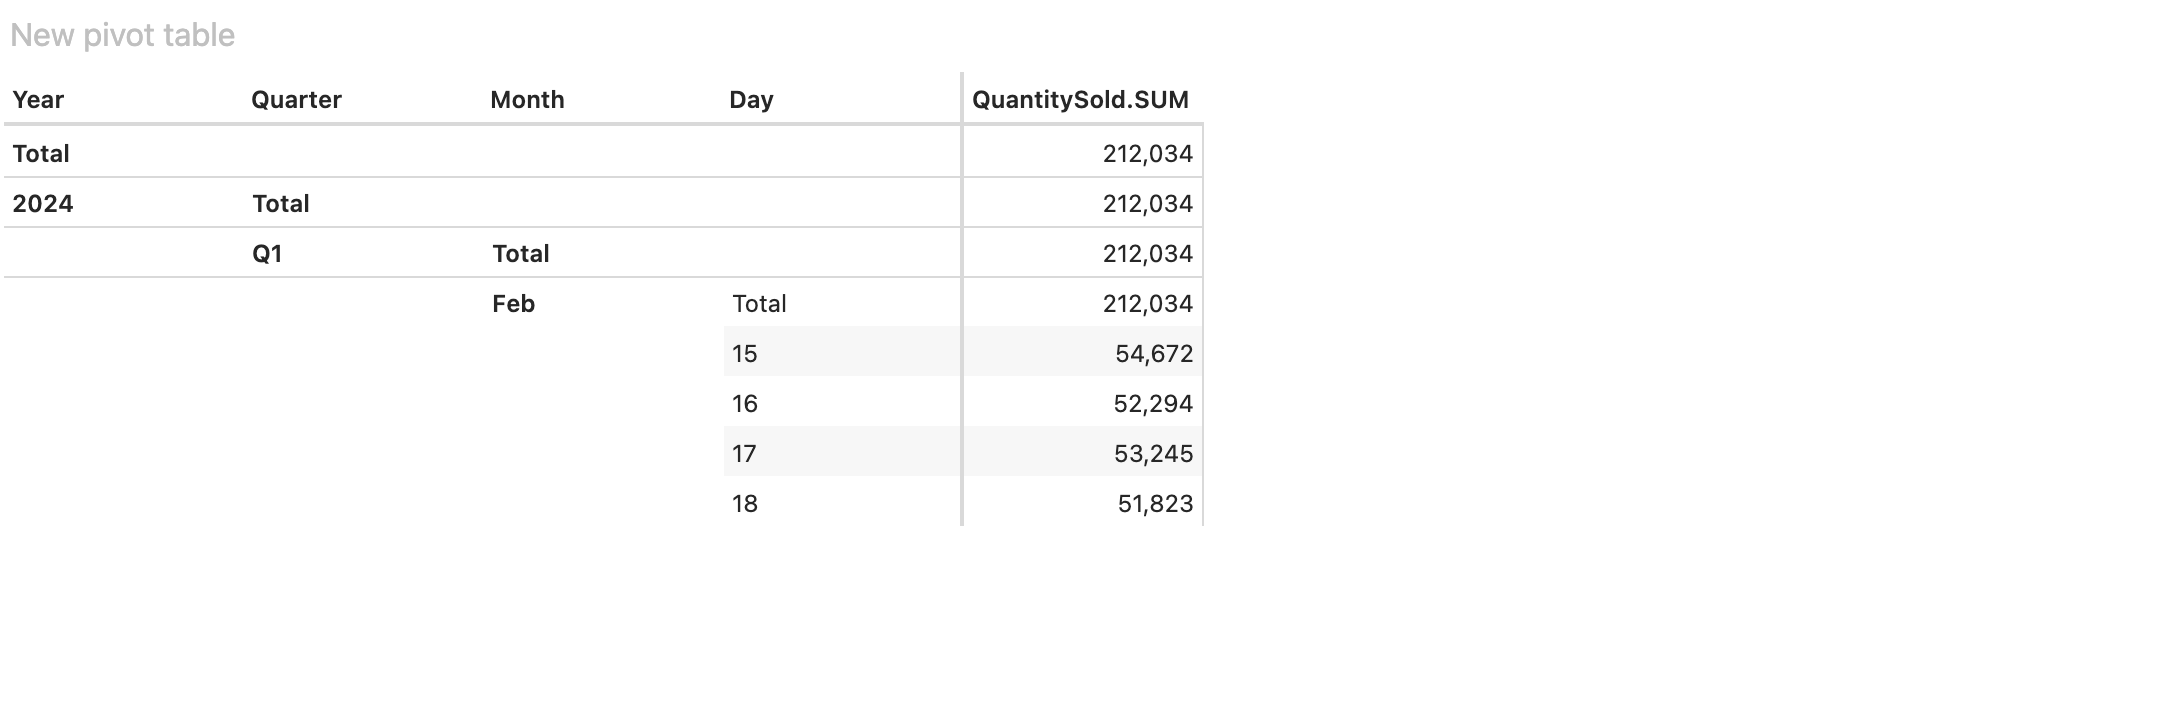

In [19]:
session.widget

## Using Hierarchy Properties and Functions

Each hierarchy is an object of the [atoti.Hierarchy](https://docs.atoti.io/latest/api/atoti.Hierarchy.html#atoti.Hierarchy) class. This means that we are able to interact with and manipulate hierarchies using their associated class properties and functions. Let's focus on using some of the more basic properties and functions.

### Basic Hierarchy Properties and Functions

#### `Hierarchy.dimension`

We can use the `dimension` property of a Hierarchy object to determine its parent dimension. For example, we can call the `dimension` property of the `Address` hierarchy to determine that its parent dimension is `Customers`. 

In [20]:
h["Address"].dimension

'Customers'

#### `Hierarchy.name`

The `name` property will output the name of the hierarchy like so:

In [21]:
h["Address"].name

'Address'

Though this is a bit redundant when we already know the name of the hierarchy. Therefore, using the `name` property may be more helpful when trying to execute a `for` loop to iterate over all hierarchies in an Atoti data model, where we may want the colloquial hierarchy name rather than the fully qualified one (with both the dimension and hierarchy listed).

In [22]:
for key in h.keys():
    print(key)

('Products', 'ProductName')
('Customers', 'PostCode')
('Employees', 'EmployeeCountry')
('Customers', 'PostalCode')
('Customers', 'Subregion')
('Employees', 'EmployeeCity')
('Customers', 'Country')
('Orders', 'OrderId')
('Orders', 'ShipperName')
('Employees', 'EmployeeZone')
('Products', 'Supplier')
('Orders', 'OrderDate')
('Orders', 'ProductId')
('Customers', 'Phone')
('Customers', 'Address')
('Customers', 'Region')
('Orders', 'Multi-level Date')
('Shippers', 'Contact')
('Orders', 'EmployeeId')
('Products', 'ProductCategory')
('Orders', 'CustomerId')
('Products', 'Product')
('Customers', 'CompanyName')
('Employees', 'EmployeeName')
('Customers', 'City')


In [23]:
for key in h.keys():
    print(h[key].name)

ProductName
PostCode
EmployeeCountry
PostalCode
Subregion
EmployeeCity
Country
OrderId
ShipperName
EmployeeZone
Supplier
OrderDate
ProductId
Phone
Address
Region
Multi-level Date
Contact
EmployeeId
ProductCategory
CustomerId
Product
CompanyName
EmployeeName
City


#### `Hierarchy.levels`



We can use the `levels` property to display the available levels for a particular hierarchy. For example, if we were to print the assigned variable that we used for `cube.levels`, this will show us all the available levels for the entire data model.

In [24]:
l

But let's say we wanted to see just the levels for our previous multi-level hierarchy `Product`. Scanning through the fully qualified list of levels may be a bit cumbersome (especially if we have a large amount of levels!). Thus, we can instead use the `levels` property for the multi-level `Product` hierarchy object to only show the levels for that particular hierarchy.

In [25]:
product_levels = h["Product"].levels

for key in product_levels.keys():
    print(key)

ProductCategory
ProductId


In [26]:
product_levels["ProductCategory"]

In [27]:
product_levels["ProductId"]

#### `Hierarchy.dimension_default`

We can also call the `dimension_default` property of a Hierarchy object to determine if a specified hierarchy is the default hierarchy in its parent dimension.

💡 **Note:** https://docs.atoti.io/latest/api/atoti.Hierarchy.dimension_default.html#atoti.Hierarchy.dimension_default

In [28]:
h["Address"].dimension_default

False

The output of the `dimension_default` property for a Hierarchy should be either `True` or `False`. In this case, the `Address` hierarchy of the `Customers` dimension is **not** the default hierarchy for the `Customers` dimension.

So which hierarchy **is** the default hierarchy for the `Customers` dimension? We can create a simple `for` loop to test this. 

💡 **Note:** The `Orders` and `Customers` tables are joined by the common key: `CustomerId`. However, from an Atoti data model perspective, `CustomerId` is a hierarchy present under the base table or `Orders` dimension, and is no longer present as a (redundant) hierarchy under the `Customers` dimension. Therefore, when checking the `Customers` dimension for its default hierarchy, we must filter out the `CustomerId` out from the search criteria — otherwise we get a missing `KeyError`.

In [29]:
def check_default_hierarchy(hierachies, table):
    """Checks for the default hierarchy for an Atoti Table object."""
    dimension = table.name
    for hierarchy in table.columns:
        if hierarchy != "CustomerId":
            print(
                f"h['{dimension}', '{hierarchy}'].dimension_default == {h[dimension, hierarchy].dimension_default}"
            )


check_default_hierarchy(h, customers)

h['Customers', 'CompanyName'].dimension_default == False
h['Customers', 'Address'].dimension_default == False
h['Customers', 'City'].dimension_default == False
h['Customers', 'PostalCode'].dimension_default == True
h['Customers', 'Region'].dimension_default == False
h['Customers', 'Country'].dimension_default == False
h['Customers', 'Subregion'].dimension_default == False
h['Customers', 'Phone'].dimension_default == False
h['Customers', 'PostCode'].dimension_default == False


We can see that the default hierarchy for the `Customers` dimension is actually `PostalCode`. If we set another hierarchy under the `Customers` dimension as the default hierarchy, it would look like this:

In [30]:
h["Address"].dimension_default = True

Then, if we re-use the `check_default_hierarchy` function that we defined previously, we can see that the default hierarchy for the `Customers` dimension has indeed been updated.

In [31]:
check_default_hierarchy(h, customers)

h['Customers', 'CompanyName'].dimension_default == False
h['Customers', 'Address'].dimension_default == True
h['Customers', 'City'].dimension_default == False
h['Customers', 'PostalCode'].dimension_default == False
h['Customers', 'Region'].dimension_default == False
h['Customers', 'Country'].dimension_default == False
h['Customers', 'Subregion'].dimension_default == False
h['Customers', 'Phone'].dimension_default == False
h['Customers', 'PostCode'].dimension_default == False


#### `Hierarchy.visible`

The `visible` property will either display or hide a hierarchy from the list of available hierarchies when using Atoti in either the Atoti JupyterLab extension or the Atoti UI. For example, if we look at our data model, we can see the `CustomerId` hierarchy present in the list of available hierarchies.

💡 **Note:** The `visible` property will **not** delete a hierarchy from an Atoti data model, it merely hides it as an available hierarchy in any of our UI interfaces. Programmatically, a hidden hierarchy can still be used.

<img src="images/hierarchies-visible-true.png" alt="hierarchies-visible-true" width="225"/>

If we use `session.widget` to select the `CustomerId` as our hierarchy and `QuantitySold.SUM` as our measure, we can see output as expected.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
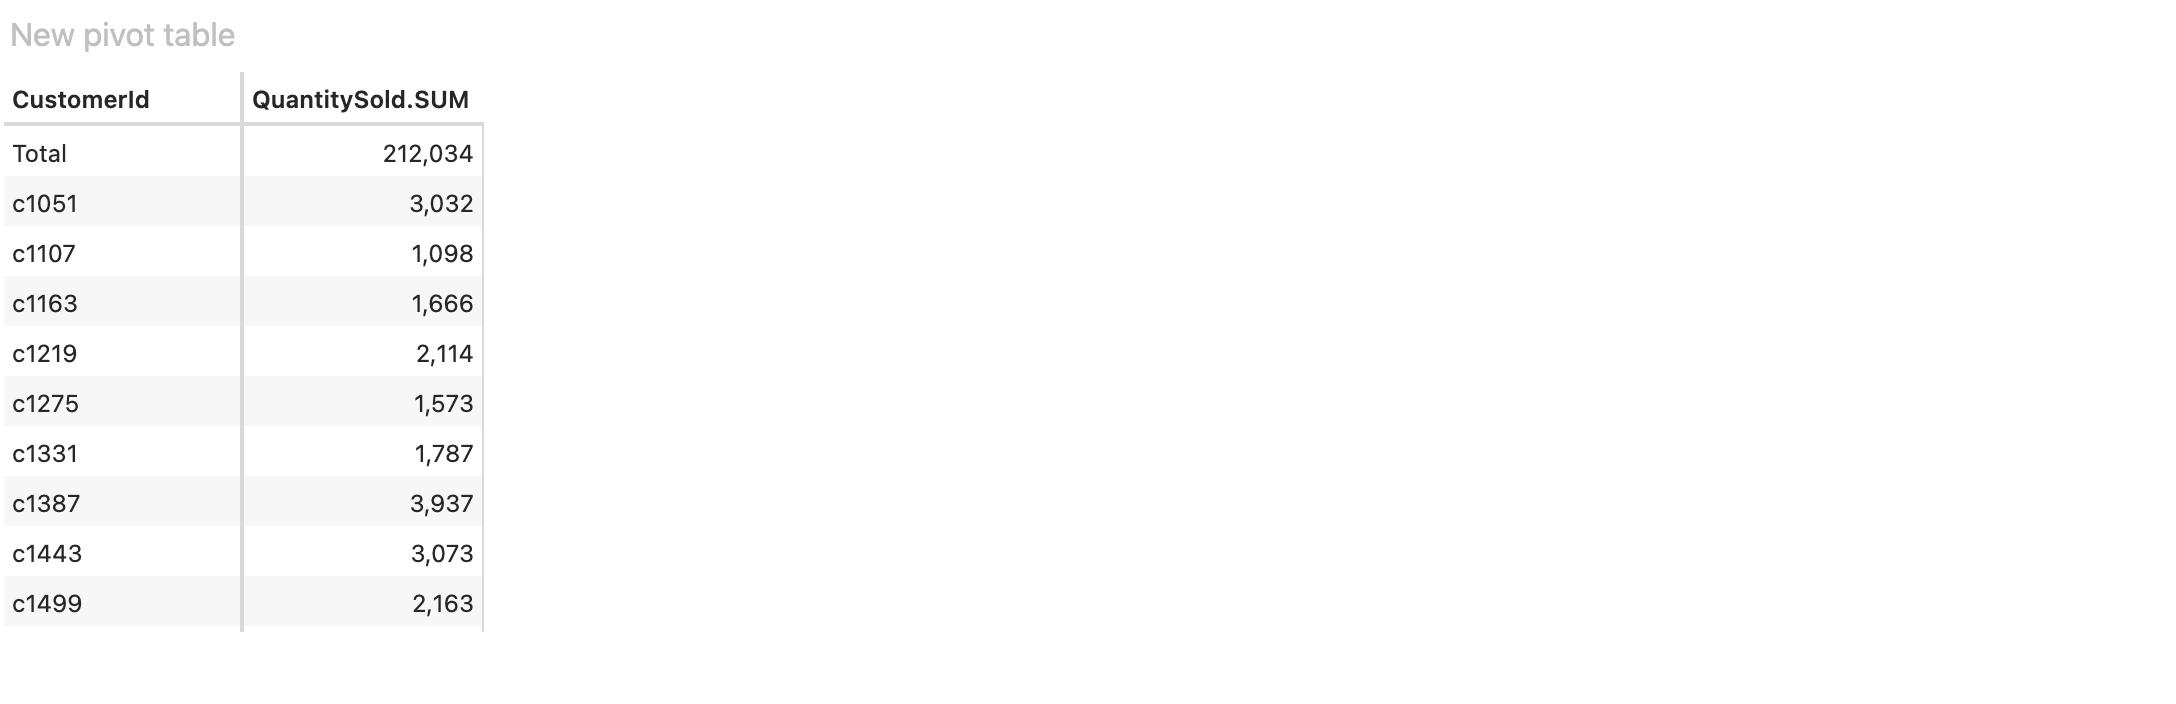

In [32]:
session.widget

However if we set the `visible` property of the `CustomerId` hierarchy to `False`, it will hide it from our list of available hierarchies as expected. 

💡 **Note:** Notice that the total number of hierarchies in the data model (`23`) does not change whether or not the `visible` property for a hierarchy is set to `True` or `False`, and that the previous `session.widget` still shows the analysis for quantity sold per customer, as the hierarchy is not **deleted** but **hidden**.

In [33]:
h["CustomerId"].visible = False

<img src="images/hierarchies-visible-false.png" alt="hierarchies-visible-false" width="225"/>

## Closing Statements

And that's it for now! 🎉

We hope that this walk through gives you a jump start for working with hierarchies in Atoti 😊. Stay tuned for more advanced topics on Atoti hierarchies in the future! Until then, take care! 👋

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=hierarchies" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try Atoti"></a></div>